In [91]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans,DBSCAN

In [104]:
df=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")
df_dbscan=pd.read_excel("EastWestAirlines.xlsx",sheet_name="data")

In [59]:
df.dropna()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [61]:
df.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

In [62]:
x=df.drop("ID#",axis=1)

# Kmeans 

In [63]:
df.shape

(3999, 12)

I have first performed grid search and then I have plotted elbow curve as per curve I'm assuming k as 2 and 4 so I'm fitting and creating a new kmeans clustering with k as 2 and 4.       

In [66]:
#grid search with range only till 11 because it will take too long for 4000 rows.
array=[]
for i in range(1,11):
    kmeans=KMeans(i,random_state=45) #number of clusters provided
    kmeans.fit(x)
    array.append(kmeans.inertia_)#giving it a head start to start making centroid for clusters
    #intertia must be only given during grid searchh

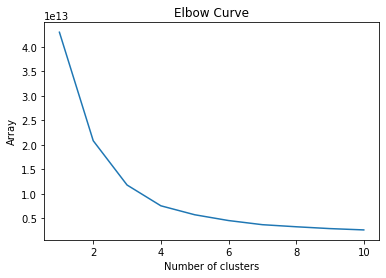

In [67]:
plt.plot(range(1,11),array)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Array')
plt.show()

In [30]:
kmeans.labels_ #since this is unsupervised learning and clustering we cannot write predict

array([0, 0, 0, ..., 0, 0, 0])

In [31]:
df["cluster_id"]=kmeans.labels_
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# K means with n_clusters as 2

In [85]:
array1=[]
kmeans2=KMeans(n_clusters=2,random_state=40)
kmeans2.fit(x)

KMeans(n_clusters=2, random_state=40)

In [86]:
kmeans2.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [87]:
df["cluster_id1"]=kmeans2.labels_

In [88]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id1
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


# Each time we provide different row we see different clustering for that row

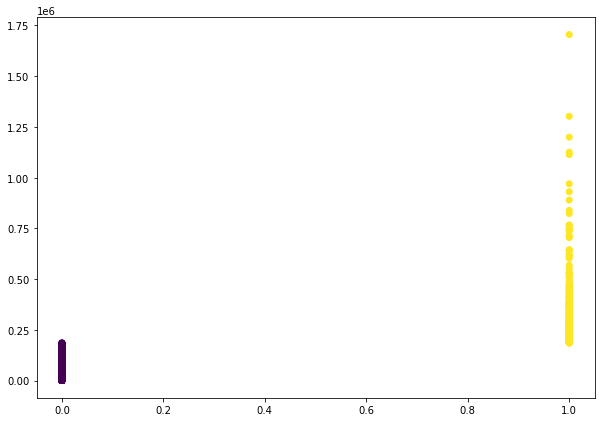

In [89]:
# to visualize the clusters formed
plt.figure(figsize=(10, 7))  
plt.scatter(df['cluster_id1'],df['Balance'], c=kmeans2.labels_) #c here is mentioned just to add colours to the clusters

# DBScan

Eps is how many points should the circle cover i.e how many points should points should be there in a cluster and min_Samples is how much cluster/groups must be formed

In [105]:
cluster_new=DBSCAN(eps=4,min_samples=7)
cluster_new.fit(x)

DBSCAN(eps=4, min_samples=7)

In [106]:
cluster_new.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [107]:
df["Dbscan"]=cluster_new.labels_

In [109]:
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Dbscan
0,1,28143,0,1,1,1,174,1,0,0,7000,0,-1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,-1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,-1
3,4,14776,0,1,1,1,500,1,0,0,6952,0,-1
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,-1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,-1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,-1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,-1


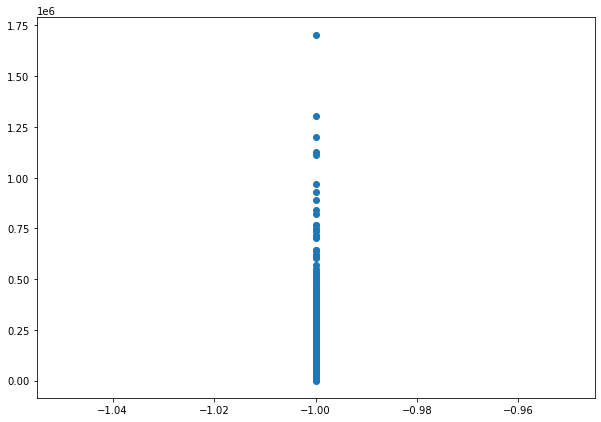

In [113]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_dbscan['Dbscan'],df['Balance']) 